# Analyze data distribution with CLUSTERING : K-means vs. Hierarchical Agglomerative Clustering (HAC) vs. DBSCAN

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES PARIS, PSL Université**

### Imports


In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Loading toy datasets from files

In [2]:
# Get data
def get_data(data_path):
    data = []
    with open(data_path, 'r') as file:
        for num, line in enumerate(file):
            if num >= 4:
                line_sep = line.strip('\n').split(sep='\t')
                single_example = [float(element) for element in line_sep][1:]
                data.append(single_example)

    return np.array(data)

In [3]:
data_atom = get_data('./clustering-examples/Atom.lrn')
data_lsun = get_data('./clustering-examples/Lsun.lrn')
data_wingnut = get_data('./clustering-examples/WingNut.lrn')
data_chainlink = get_data('./clustering-examples/Chainlink.lrn')
data_twodiamonds = get_data('./clustering-examples/TwoDiamonds.lrn')

### Visualizing datasets

In [4]:
def data_show(data):
    num_dim = data.shape[1]

    # Show
    fig = plt.figure()
    if num_dim == 2:
        plt.scatter(data[:, 0], data[:, 1])
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
    plt.show()

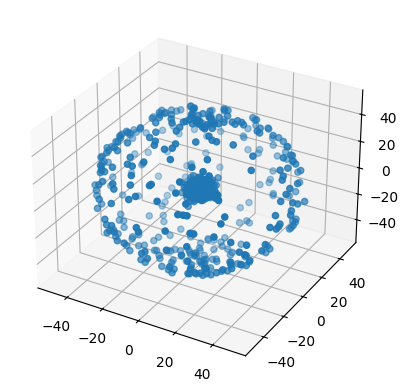

In [5]:
data_show(data_atom)

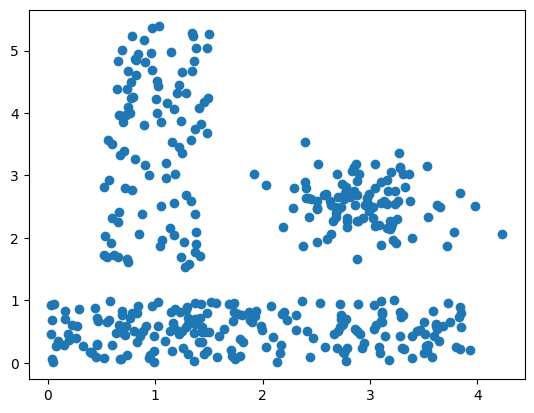

In [6]:
data_show(data_lsun)

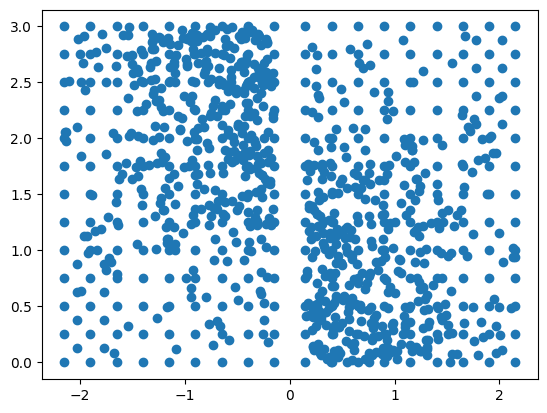

In [7]:
data_show(data_wingnut)

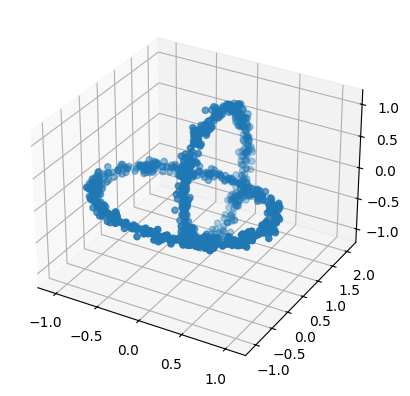

In [8]:
data_show(data_chainlink)

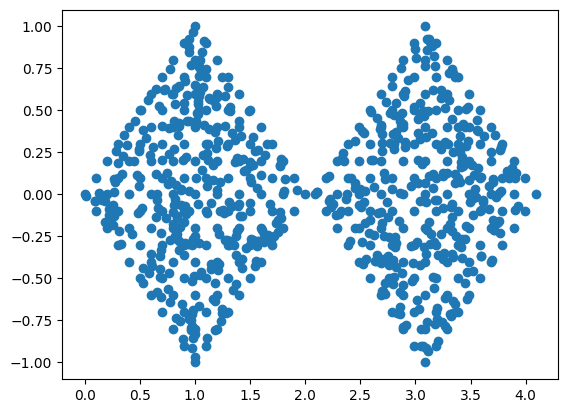

In [9]:
data_show(data_twodiamonds)

## 1. K-means

**Test the K-means clustering method, implemented in SciKit-Learn by the class sklearn.cluster.KMeans.**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Then experiment K-means on each of the 5 datasets, and with several values for K**

[[3.06688924 1.71003656]
 [1.12787598 0.715386  ]
 [1.05201945 3.97981589]]


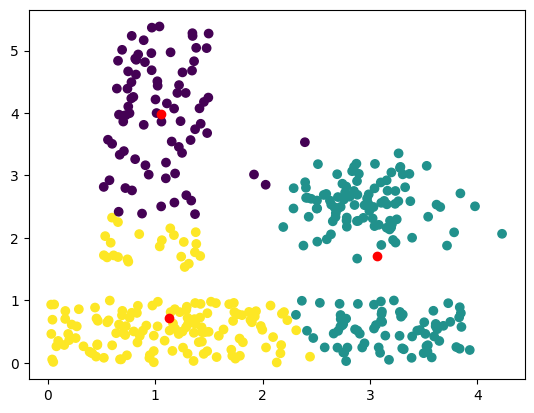

In [10]:
km = KMeans(n_clusters=3, init='k-means++', n_init='auto', max_iter=300,
            tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
cluster = km.fit(data_lsun)
centroid = cluster.cluster_centers_
print(centroid)
y_pred = cluster.fit_predict(data_lsun)
fig = plt.figure()
plt.scatter(data_lsun[:, 0], data_lsun[:, 1], c=y_pred)
plt.scatter(centroid[:, 0], centroid[:, 1], c="r")
plt.show()

# Insert below the code to test Kmeans, with various values of K, on the 5 datasets

#### QUESTION 1: Does the K-means algo always produce the expected result?

No. As an example, there are some points in the above image that should be purple but turned out to be cyan.

#### QUESTION 2: What is the only shape of cluster that K-means is capable of isolating?

K-means is only capable of isolating clusters that are roughly spherical or circular in shape. This is because it partitions the space into Voronoi cells, which are defined by the distance to the cluster centroids.

## 2. Hierarchical Agglomerative Clustering

**Now, test the Hierarchical Agglomerative Clustering (HAC), implemented in SciKit-Learn by the class sklearn.cluster.AgglomerativeClustering**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

**Then experiment Agglomerative Clustering on each of the 5 datasets, with either single-linkage or complete-linkage, and with several values for the requested number of clusters**

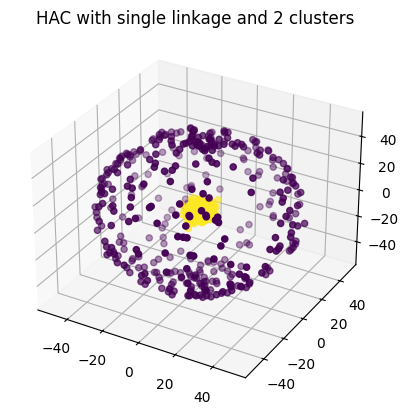

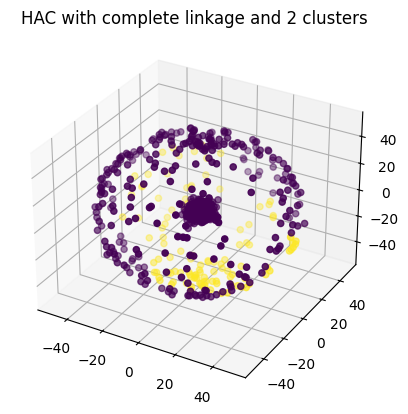

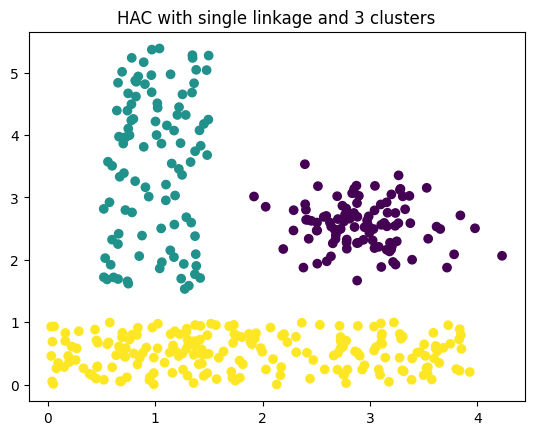

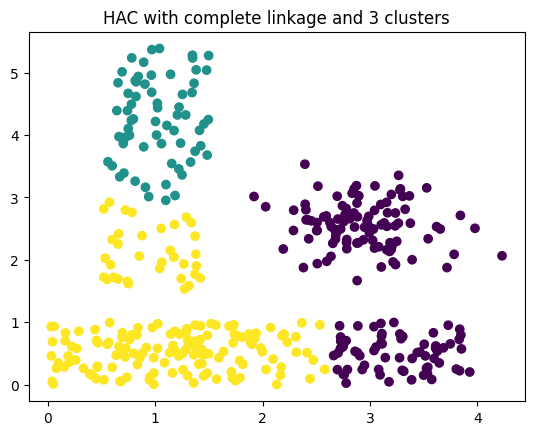

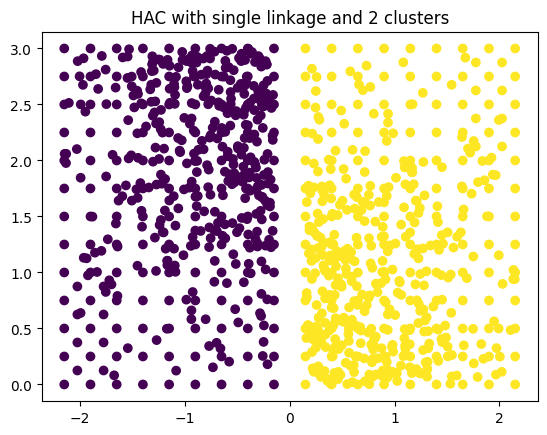

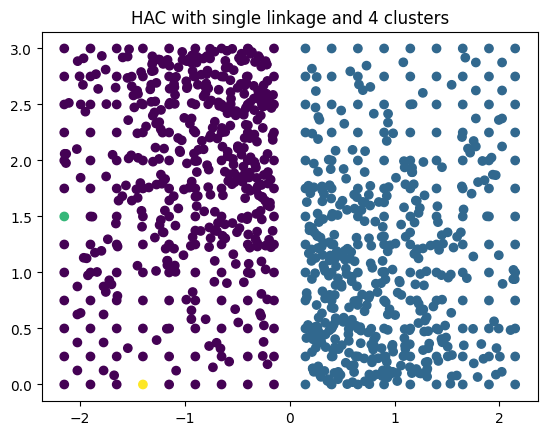

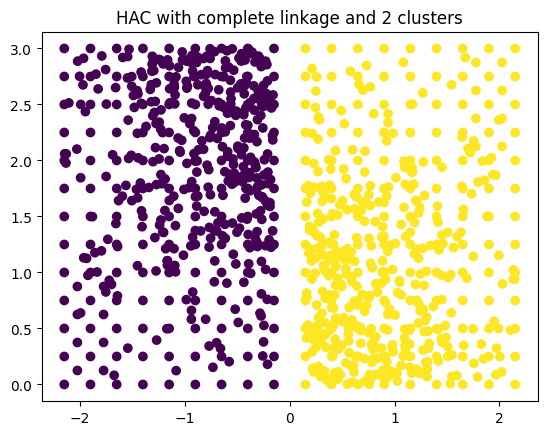

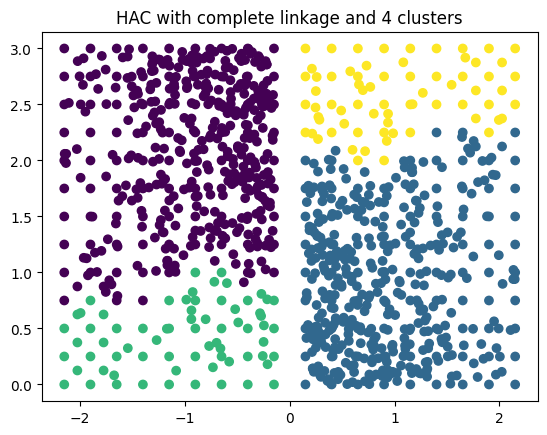

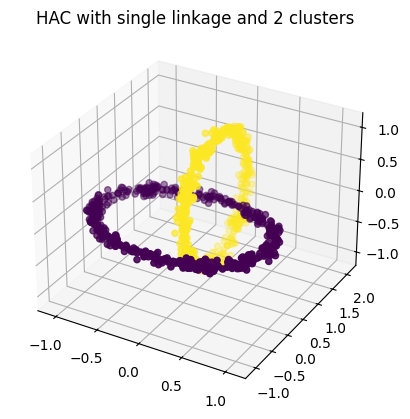

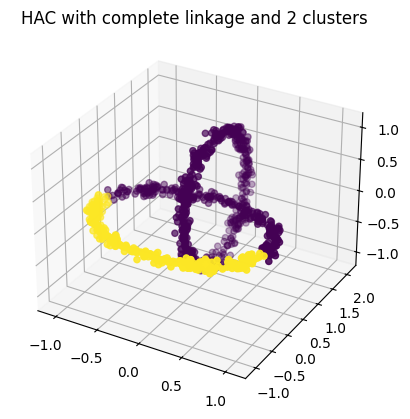

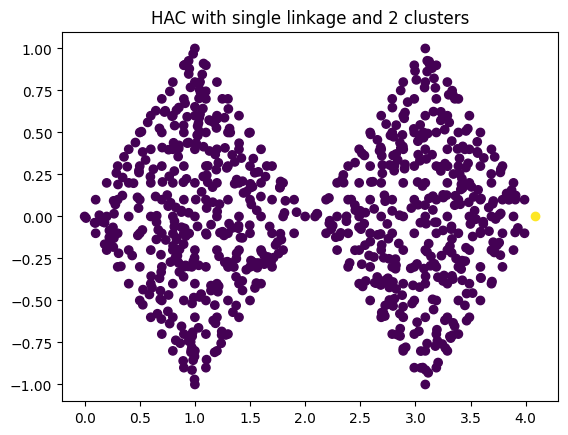

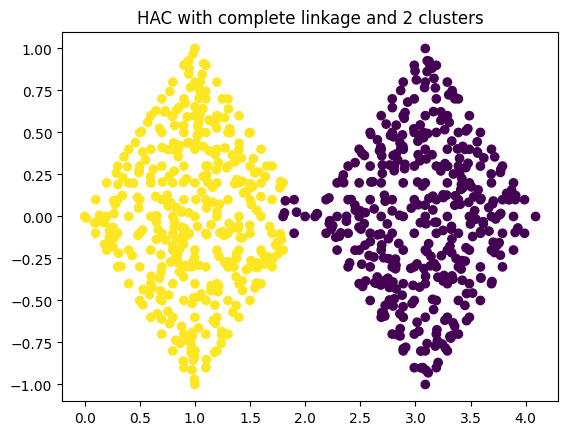

In [11]:
# Insert below the code to test Hierarchical Agglomerative Clustering on the datasets
def hac_clustering(data, n_clusters, linkage):
    hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    y_pred = hac.fit_predict(data)
    fig = plt.figure()
    if data.shape[1] == 2:
        plt.scatter(data[:, 0], data[:, 1], c=y_pred)
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], c=y_pred)
    plt.title(f'HAC with {linkage} linkage and {n_clusters} clusters')
    plt.show()


dats = [data_atom, data_lsun, data_wingnut, data_chainlink, data_twodiamonds]
linkages = ['single', 'complete']
ds_n = [[2], [3], [2, 4], [2], [2]]

for id, data in enumerate(dats):
    for linkage in linkages:
        for n in ds_n[id]:
            hac_clustering(data, n, linkage)

#### QUESTION 3: On which dataset does "single-linkage" HAC produce an excellent result? Why is it logical?

Atom, Lson, Chainlink. Because they have elongated or chain-like structures, making single-linkage a good fit because it can capture the chaining effect and identify these structures accurately.


#### QUESTION 4: Conversely, on which dataset does "single-linkage" HAC perform very BADLY, and why is it expected?

On wingnut (4 clusters) and two diamonds, bacause they are compact and near-spherical.


#### QUESTION 5: By comparing with what you had observed for K-means, which variant of HAC (between single-linkage and complete-linkage) seems to be the most complementary to K-means?

Single linkage. K-means likes spherical data and single-linkage HAC on the opposite.


## 3. Density-based Clustering DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm working in 2 steps:
- All examples that are sufficiently close one to another are connected
- Examples that have a minimal number of connected neighbors are considered as *core samples*, from which the clusters are built by extension (**all examples sufficiently close to a *core sample* are assigned to the same cluster as the core sample**. 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

**Experiment DBSCAN below on the 5 datasets
 (note that you mays need to adapt eps depending on dataset)**

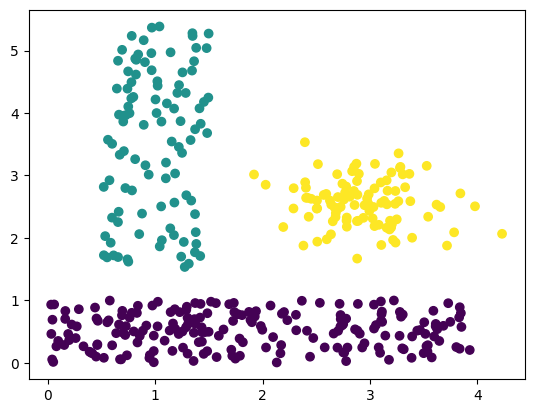

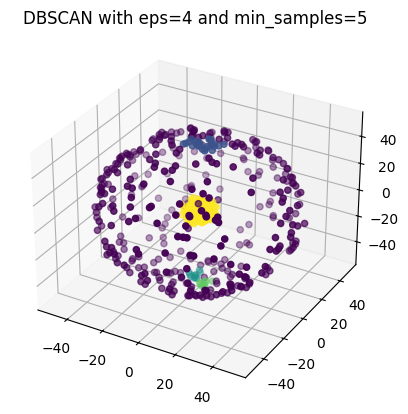

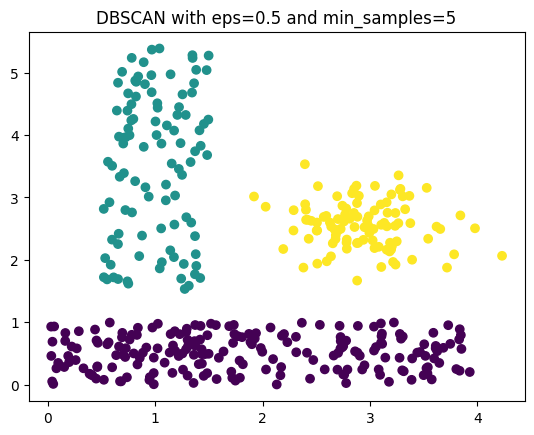

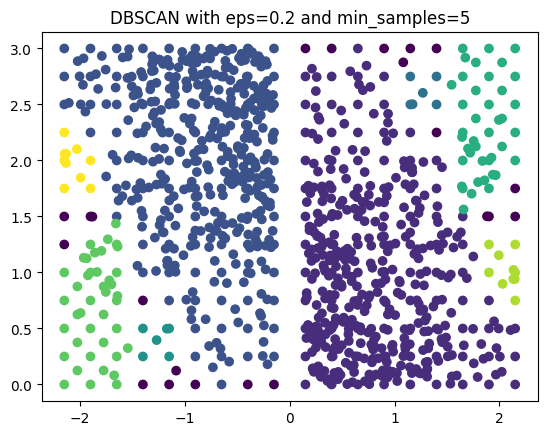

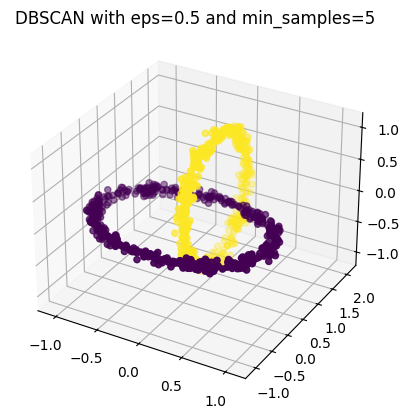

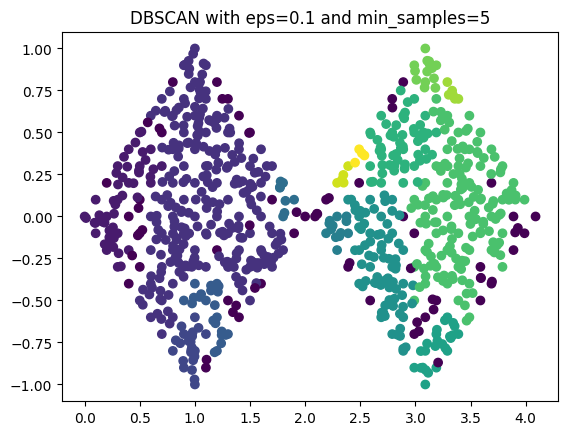

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
lsun_dbscan = dbscan.fit(data_lsun)
y_pred = lsun_dbscan.fit_predict(data_lsun)
fig = plt.figure()
plt.scatter(data_lsun[:, 0], data_lsun[:, 1], c=y_pred)
plt.show()

# COMPLETE THE CODE BELOW TO TEST DBSCAN ON THE 5 DATASETS


def dbscan_clustering(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(data)

    fig = plt.figure()
    if data.shape[1] == 2:
        plt.scatter(data[:, 0], data[:, 1], c=y_pred)
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], c=y_pred)
    plt.title(f'DBSCAN with eps={eps} and min_samples={min_samples}')
    plt.show()


# Test DBSCAN on the datasets
datas = [data_atom, data_lsun, data_wingnut, data_chainlink, data_twodiamonds]
eps = [4, 0.5, 0.2, 0.5, 0.1]
for data, eps in zip(datas, eps):
    dbscan_clustering(data, eps)

### To learn more about OTHER clustering methods (such as Spectral Clustering) implemented in SciKit-Learn, you can look at the following page: https://scikit-learn.org/stable/modules/clustering.html

## 4. Now experiment clustering on a more realistics dataset: the Digits Dataset https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [13]:
# Load the digits dataset
from sklearn import datasets
digits = datasets.load_digits()

### The goal is to check if the 10 classes correspond or not to separate clusters in input space
**Therefore, you should perform clustering, with 10 or more clusters (as one class could correspond to more than one cluster), on the dataset WITHOUT USING LABELS**
**Then, you should analyze the distribution of labels of examples in each of the obtained clusters, in order to measure how homogeneous in terms of labels is each cluster, and check if it is possible to obtain a one-to-one (or one-to-few) correspondance between classes and clusters.**

Number_of-examples =  1797

 Plot of first example


<Figure size 640x480 with 0 Axes>

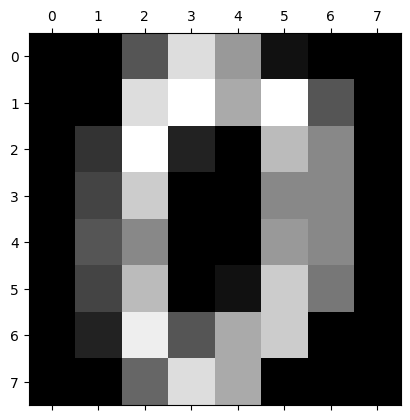

<Figure size 640x480 with 0 Axes>

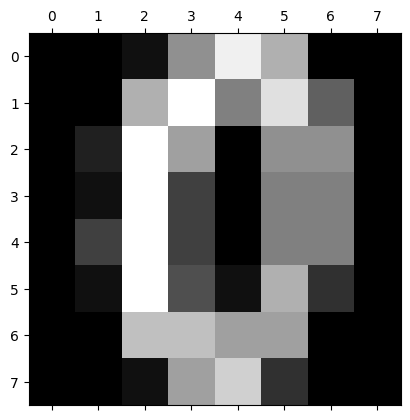

first answer: 0


In [19]:
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

print("\n Plot of first example")
plt.gray()
plt.matshow(digits.images[0])
plt.show()

plt.gray()
plt.matshow(digits.images[10])
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Split dataset into training and test part
X = data
y = digits.target
print(f'first answer: {y[0]}')

In the code below, I use K-Means to directly get the clusters, and PCA to analyze label distribution.

/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


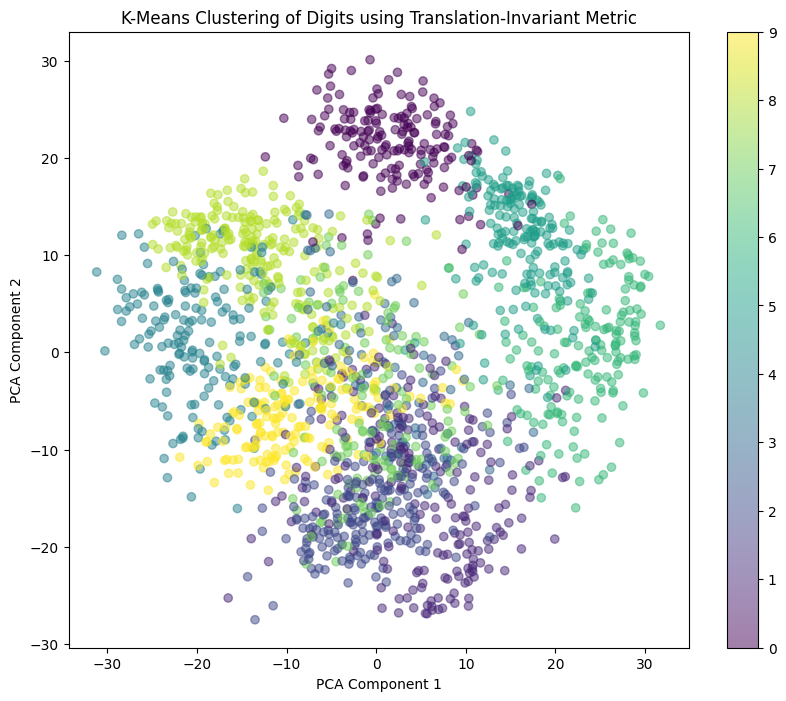

     0    1    2   3    4    5    6    7    8    9
0  176    0    0   0    0    0    2    0    0    0
1    0  100    0  54    1    2    0    1    0   24
2    1    8    3   2   13    0    0    0    2  148
3    0    7    7   0  154    0    0    2   13    0
4    0    2   11   3    0    0  165    0    0    0
5    0    0    0   0    2    1    2  136   41    0
6    1    3    0   0    0  177    0    0    0    0
7    0    2  174   2    0    0    0    1    0    0
8    0  100    5   6    2    2    0    4   52    3
9    0    1    8  20    6    0    0    6  139    0


In [2]:
# execute without the above code!
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

digits = datasets.load_digits()
X = digits.data
y = digits.target


# of no use
def translation_invariant_metric(X):
    shift_mean = X - np.mean(X, axis=1, keepdims=True)
    return pairwise_distances(shift_mean)


preprocessed_data = X
kmeans = KMeans(n_clusters=10, random_state=0)
labels = kmeans.fit_predict(preprocessed_data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('K-Means Clustering of Digits using Translation-Invariant Metric')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

confusion_mat = confusion_matrix(y, labels)
confusion_df = pd.DataFrame(
    confusion_mat, index=np.arange(10), columns=np.arange(10))
print(confusion_df)

HAC is not effective. 

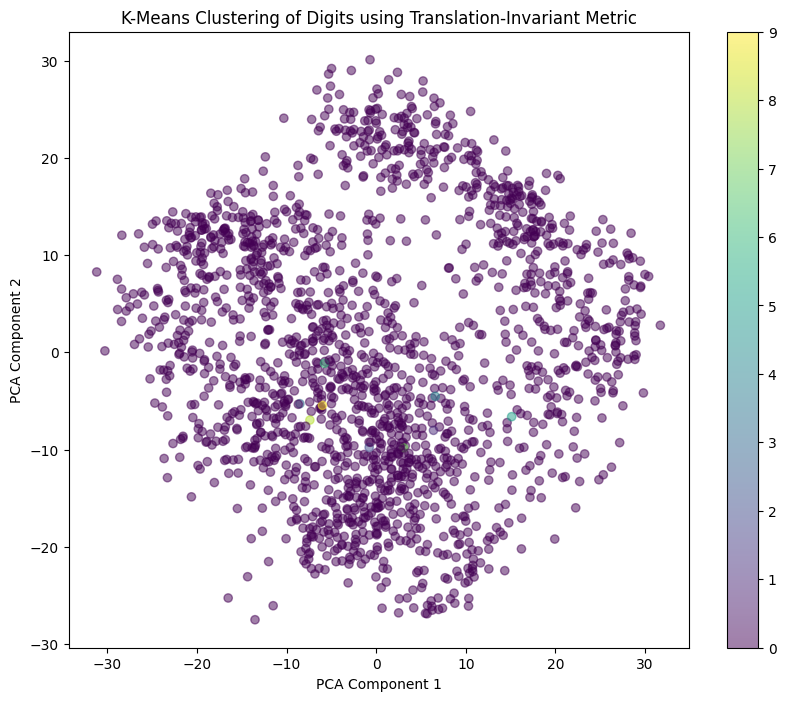

     0  1  2  3  4  5  6  7  8  9
0  178  0  0  0  0  0  0  0  0  0
1  182  0  0  0  0  0  0  0  0  0
2  175  0  0  0  0  0  0  1  1  0
3  183  0  0  0  0  0  0  0  0  0
4  181  0  0  0  0  0  0  0  0  0
5  182  0  0  0  0  0  0  0  0  0
6  180  0  0  0  1  0  0  0  0  0
7  178  1  0  0  0  0  0  0  0  0
8  170  0  1  1  0  1  0  0  0  1
9  179  0  0  0  0  0  1  0  0  0


In [8]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters=10, linkage='single')
labels = hac.fit_predict(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('K-Means Clustering of Digits using Translation-Invariant Metric')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

confusion_mat = confusion_matrix(y, labels)
confusion_df = pd.DataFrame(
    confusion_mat, index=np.arange(10), columns=np.arange(10))
print(confusion_df)
# very bad